In [165]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [166]:
train = pd.read_csv('train (3).csv', index_col = ['Id'])
X_test = pd.read_csv('test.csv', index_col = ['Id'])

X_train = train.drop(['SalePrice'], axis = 1)
y_train = train[['SalePrice']]
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [167]:
X = pd.concat([X_train, X_test])

In [168]:
def cat(data, s):
    dictt = dict(zip(data[s].unique(), list(range(len(data[s].unique())))))
    data[s] = data[s].apply(lambda c: dictt.get(c))

def prep(data):
    for s in data.columns:
        if data[s].dtype == 'O':
            cat(data, s)
        else:
            data[s].fillna(data[s].mean(), inplace = True)

In [169]:
prep(X)

In [170]:
X[X.columns] =  StandardScaler().fit_transform(X)

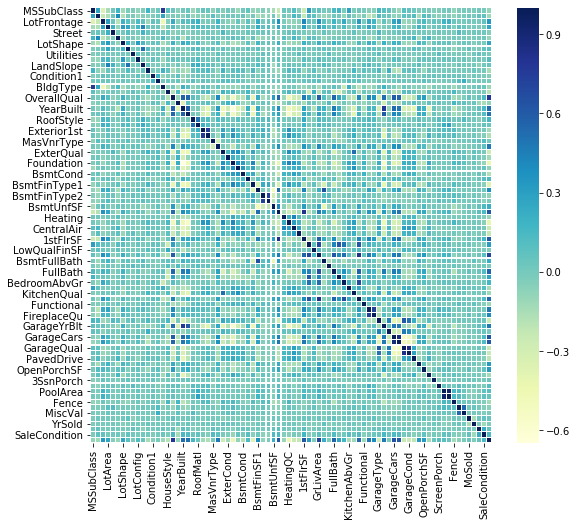

In [171]:
prep(train)
corrmat1 = train.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat1, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [172]:
col1 = []
for s in corrmat1.columns:
    if abs(corrmat1['SalePrice'].loc[s]) > 0.05:
        col1.append(s)
        
col1

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'SalePrice']

In [175]:
X = X[col1[:-1]]

X_train = X.iloc[:1460]
X_test = X.iloc[1460:]

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor


model = XGBRegressor(random_state = 1)
model.fit(X_train, y_train)
print(cross_val_score(model, X_train, y_train, cv=3).mean())
y_test = model.predict(X_test)

y_test

[15:01:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:01:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:01:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:01:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8852600240098435


array([120856.82, 153566.27, 177881.73, ..., 176014.03, 116714.02,
       234904.45], dtype=float32)

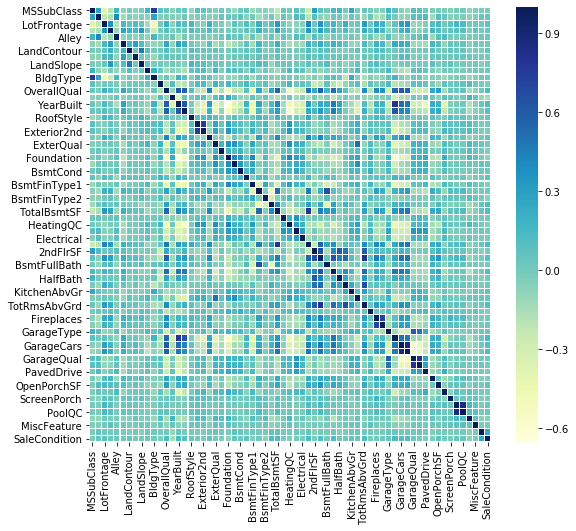

In [178]:
corrmat = X.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [179]:
col = []
for s1 in corrmat.columns:
    for s2 in corrmat.columns:
        if s1 != s2:
            if abs(corrmat[s1].loc[s2]) > 0.8:
                if s1 not in col:
                    print(s1, s2)
                    col.append(s2)

TotalBsmtSF 1stFlrSF
GrLivArea TotRmsAbvGrd
GarageCars GarageArea
GarageQual GarageCond
PoolArea PoolQC


In [180]:
for s in X.columns:
    if s in col:
        X.drop([s], axis = 1, inplace = True)

In [181]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,0.067331,-0.440683,-0.202068,-0.217879,-0.25356,-0.701900,-0.304727,-0.575536,-0.21626,-1.664155,...,-0.305475,-0.740760,0.200006,-0.359601,-0.285935,-0.06315,-0.426388,-0.175967,-0.293946,-0.390438
2,-0.873616,-0.440683,0.501870,-0.072044,-0.25356,-0.701900,-0.304727,0.417953,-0.21626,-1.490195,...,-0.305475,1.614879,-0.702843,-0.359601,-0.285935,-0.06315,-0.426388,-0.175967,-0.293946,-0.390438
3,0.067331,-0.440683,-0.061280,0.137197,-0.25356,1.052249,-0.304727,-0.575536,-0.21626,-1.664155,...,-0.305475,-0.740760,-0.081209,-0.359601,-0.285935,-0.06315,-0.426388,-0.175967,-0.293946,-0.390438
4,0.302568,-0.440683,-0.436714,-0.078385,-0.25356,1.052249,-0.304727,1.411441,-0.21626,-1.316235,...,-0.305475,-0.740760,-0.184815,3.874967,-0.285935,-0.06315,-0.426388,-0.175967,-0.293946,0.703314
5,0.067331,-0.440683,0.689587,0.518903,-0.25356,1.052249,-0.304727,0.417953,-0.21626,-1.142274,...,-0.305475,0.776967,0.540424,-0.359601,-0.285935,-0.06315,-0.426388,-0.175967,-0.293946,-0.390438


In [182]:
X_train = X.iloc[:1460]
X_test = X.iloc[1460:]

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso


model = XGBRegressor(random_state = 1)
model.fit(X_train, y_train)
print(cross_val_score(model, X_train, y_train, cv=3).mean())
y_test = model.predict(X_test)

y_test

[15:02:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:02:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:02:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:02:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8823731154228128


array([121454.07, 155186.97, 177110.  , ..., 175069.73, 120278.9 ,
       237176.92], dtype=float32)

In [185]:
answer = pd.DataFrame()
answer['Id'] = X_test.index
answer['SalePrice'] = y_test
answer.to_csv('answer.csv', sep = ',', index=False)

In [17]:
X_test.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)